# Week 2 Battle of Neighborhoods
## Identify the best neighborhoods in Manhattan, NYC to start a restaurant

### Installing the packages

In [1]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


### Importing all the required libraries

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Getting the Most expensive Neighborhoods in NYC from web scrapping
### Converted the data to an excel file and reading the excel file in pandas
## The excel file had information of the median house prices in the neighborhood and the number of transactions per year

In [7]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('Most_Expensive_Neighborhood_NYC.xlsx')

print("Column headings:")
print(df.columns)

Column headings:
Index(['Position', 'Borough', 'Neighborhoud', 'Median Sale Price', 'Y-o-Y',
       'Transactions'],
      dtype='object')


### The first five rows of the excel file

In [8]:
df.head()


,Position,Borough,Neighborhoud,Median Sale Price,Y-o-Y,Transactions
0,1,Manhattan,TriBeCa,4445767,0.22,125
1,2,Manhattan,SoHo,3600000,0.29,51
2,3,Manhattan,NoHo,2662500,-0.46,6
3,4,Brooklyn,DUMBO,2404070,0.54,53
4,5,Manhattan,NoMad,1960131,0.33,75


### Filtering the data for only the Borough - Manhanttan

In [9]:
df2 = df.loc[df['Borough'] == 'Manhattan']
print (df2)

    Position    Borough                     Neighborhoud  Median Sale Price  \
0          1  Manhattan                          TriBeCa            4445767   
1          2  Manhattan                             SoHo            3600000   
2          3  Manhattan                             NoHo            2662500   
4          5  Manhattan                            NoMad            1960131   
5          6  Manhattan                    Hudson Square            1894321   
6          7  Manhattan                          Chelsea            1830000   
7          8  Manhattan                Battery Park City            1705000   
8          9  Manhattan                Greenwich Village            1650000   
9         10  Manhattan                    Carnegie Hill            1595000   
11        12  Manhattan  Theatre District - Times Square            1432919   
14        15  Manhattan                  Central Midtown            1300000   
15        16  Manhattan                Flatiron Dist

### Taking only the neighborhoods that had more than 100 transactions (houses sold) per year

In [10]:
df3 = df2.loc[df['Transactions'] > 100]
print (df3)

    Position    Borough              Neighborhoud  Median Sale Price  Y-o-Y  \
0          1  Manhattan                   TriBeCa            4445767   0.22   
6          7  Manhattan                   Chelsea            1830000   0.53   
8          9  Manhattan         Greenwich Village            1650000   0.61   
9         10  Manhattan             Carnegie Hill            1595000  -0.17   
16        17  Manhattan            Lincoln Square            1210000   0.00   
17        18  Manhattan           Upper West Side            1200000   0.03   
21        22  Manhattan        Financial District            1089673   0.09   
22        23  Manhattan                Lenox Hill            1086250   0.09   
29        30  Manhattan  Clinton - Hell's Kitchen             985000  -0.02   
39        40  Manhattan               Murray Hill             850000   0.06   
40        40  Manhattan                 Yorkville             850000   0.12   

    Transactions  
0            125  
6            

### Top ten expensive and active neighborhood based on number of houses sold and median price 

In [11]:
df4 = df3.head(10)
print (df4)

    Position    Borough              Neighborhoud  Median Sale Price  Y-o-Y  \
0          1  Manhattan                   TriBeCa            4445767   0.22   
6          7  Manhattan                   Chelsea            1830000   0.53   
8          9  Manhattan         Greenwich Village            1650000   0.61   
9         10  Manhattan             Carnegie Hill            1595000  -0.17   
16        17  Manhattan            Lincoln Square            1210000   0.00   
17        18  Manhattan           Upper West Side            1200000   0.03   
21        22  Manhattan        Financial District            1089673   0.09   
22        23  Manhattan                Lenox Hill            1086250   0.09   
29        30  Manhattan  Clinton - Hell's Kitchen             985000  -0.02   
39        40  Manhattan               Murray Hill             850000   0.06   

    Transactions  
0            125  
6            123  
8            144  
9            109  
16           165  
17           290

### Dropped the other columns containing Median Sales Price, Year to year change and Transactions

In [12]:
df5 = df4.drop(columns=['Position', 'Median Sale Price', 'Y-o-Y', 'Transactions'])
print (df5)

      Borough              Neighborhoud
0   Manhattan                   TriBeCa
6   Manhattan                   Chelsea
8   Manhattan         Greenwich Village
9   Manhattan             Carnegie Hill
16  Manhattan            Lincoln Square
17  Manhattan           Upper West Side
21  Manhattan        Financial District
22  Manhattan                Lenox Hill
29  Manhattan  Clinton - Hell's Kitchen
39  Manhattan               Murray Hill


## Top ten expensive & active neighborhoods in Manhattan

In [13]:
df5.reset_index(drop=True, inplace=True)
print (df5)

     Borough              Neighborhoud
0  Manhattan                   TriBeCa
1  Manhattan                   Chelsea
2  Manhattan         Greenwich Village
3  Manhattan             Carnegie Hill
4  Manhattan            Lincoln Square
5  Manhattan           Upper West Side
6  Manhattan        Financial District
7  Manhattan                Lenox Hill
8  Manhattan  Clinton - Hell's Kitchen
9  Manhattan               Murray Hill


### Importing geocoder package to add Lattitude and Longitude data for the neighborhoods

In [14]:
import geocoder # import geocoder

# initialize your variable to None

def get_geocoder(Neighborhood):
# loop until you get the coordinates
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Manhattan, New York'.format(Neighborhood))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude, longitude

### Adding Latitude and Longitude data into the dataframe

In [15]:
df5['Latitude'], df5['Longitude'] = zip(*df5['Neighborhoud'].apply(get_geocoder))

In [16]:
df5.head()

,Borough,Neighborhoud,Latitude,Longitude
0,Manhattan,TriBeCa,40.71845,-74.00889
1,Manhattan,Chelsea,40.74777,-73.99072
2,Manhattan,Greenwich Village,40.73211,-73.99648
3,Manhattan,Carnegie Hill,40.76495,-73.98043
4,Manhattan,Lincoln Square,40.77678,-73.98296


In [17]:
df5.shape

(10, 4)

## Visualing the top 10 expensive and active neighborhoods in Manhattan

In [18]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [19]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df5['Latitude'], df5['Longitude'], df5['Neighborhoud']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

## Foursquare credentials

In [20]:
CLIENT_ID = 'THDIHPE40EJKF2DPNEAAVPDKOVGERSCV0OK1TF2SQ0RRGXYT' # your Foursquare ID
CLIENT_SECRET = 'DCVOD3QPAGCKUEUD0Z0ZQFYVEAKY23W2GIBZGLJQSGLJ4IGZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: THDIHPE40EJKF2DPNEAAVPDKOVGERSCV0OK1TF2SQ0RRGXYT
CLIENT_SECRET:DCVOD3QPAGCKUEUD0Z0ZQFYVEAKY23W2GIBZGLJQSGLJ4IGZ


### Getting Top 100 venues for the ten most expensive and active neighborhoods in Manhattan

In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
#-->

#<!--
radius = 500 # define radius
#-->

#<!--
#\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=THDIHPE40EJKF2DPNEAAVPDKOVGERSCV0OK1TF2SQ0RRGXYT&client_secret=DCVOD3QPAGCKUEUD0Z0ZQFYVEAKY23W2GIBZGLJQSGLJ4IGZ&v=20180605&radius=500&limit=100'

### Get Nearby Venues Function 

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Top 100 venues for the ten most expensive and active neighborhoods in Manhattan

In [23]:
manhattan_venues = getNearbyVenues(names=df5['Neighborhoud'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )



TriBeCa
Chelsea
Greenwich Village
Carnegie Hill
Lincoln Square
Upper West Side
Financial District
Lenox Hill
Clinton - Hell's Kitchen
Murray Hill


In [24]:
print(manhattan_venues.shape)
manhattan_venues.head()

(939, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,TriBeCa,40.71845,-74.00889,Locanda Verde,40.719981,-74.010002,Italian Restaurant
1,TriBeCa,40.71845,-74.00889,Tamarind TriBeCa,40.719211,-74.008727,Indian Restaurant
2,TriBeCa,40.71845,-74.00889,Terroir,40.718752,-74.010115,Wine Bar
3,TriBeCa,40.71845,-74.00889,Gotan,40.719217,-74.006642,Café
4,TriBeCa,40.71845,-74.00889,Thom Browne,40.719257,-74.008389,Men's Store


## Filtering the Venue Category to focus only on the Category - Restaurants 
### Created a dataframe with the top ten expensive neighborhoods, latitude and longitude information, Name of the Restaurant(Venue) and Type of Restaurant (Venue Category)

In [66]:
df7 = manhattan_venues[manhattan_venues['Venue Category'].str.contains("Restaurant")]
df7.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,TriBeCa,40.71845,-74.00889,Locanda Verde,40.719981,-74.010002,Italian Restaurant
1,TriBeCa,40.71845,-74.00889,Tamarind TriBeCa,40.719211,-74.008727,Indian Restaurant
8,TriBeCa,40.71845,-74.00889,Jungsik,40.718695,-74.009070,Korean Restaurant
11,TriBeCa,40.71845,-74.00889,Takahachi,40.716526,-74.008101,Sushi Restaurant
14,TriBeCa,40.71845,-74.00889,Khe-Yo,40.716753,-74.008584,Asian Restaurant


### Duplicated the above dataframe

In [67]:
#df8 = df7.groupby('Neighborhood', 'Neighborhood Lattitude').count()
df8 = df7
df8.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,TriBeCa,40.71845,-74.00889,Locanda Verde,40.719981,-74.010002,Italian Restaurant
1,TriBeCa,40.71845,-74.00889,Tamarind TriBeCa,40.719211,-74.008727,Indian Restaurant
8,TriBeCa,40.71845,-74.00889,Jungsik,40.718695,-74.009070,Korean Restaurant
11,TriBeCa,40.71845,-74.00889,Takahachi,40.716526,-74.008101,Sushi Restaurant
14,TriBeCa,40.71845,-74.00889,Khe-Yo,40.716753,-74.008584,Asian Restaurant


### Grouped the dataframe by neighborhood and got the count of different type of restaurants(Cat_Count) in that particular neighborhood

In [92]:
df9 = df8.groupby(['Neighborhood', 'Venue Category']).size().reset_index(name = "Cat_Count")
df9.head()

,Neighborhood,Venue Category,Cat_Count
0,Carnegie Hill,American Restaurant,1
1,Carnegie Hill,Cuban Restaurant,2
2,Carnegie Hill,Fast Food Restaurant,1
3,Carnegie Hill,French Restaurant,1
4,Carnegie Hill,Greek Restaurant,3


### Grouped the dataframe by neighborhood and got the total number of restaurants(Cat_Count) in that particular neighborhood

In [108]:
z = df8.groupby(['Neighborhood']).size().reset_index(name = "Cat_Count")
z.head(10)

,Neighborhood,Cat_Count
0,Carnegie Hill,24
1,Chelsea,19
2,Clinton - Hell's Kitchen,29
3,Financial District,16
4,Greenwich Village,25
5,Lenox Hill,6
6,Lincoln Square,20
7,Murray Hill,39
8,TriBeCa,29
9,Upper West Side,25


### Added Latitude and Longitude information to the above dataframe 

In [109]:
z['Latitude'], z['Longitude'] = zip(*z['Neighborhood'].apply(get_geocoder))

In [111]:
z.head(10)

,Neighborhood,Cat_Count,Latitude,Longitude
0,Carnegie Hill,24,40.764950,-73.980430
1,Chelsea,19,40.747770,-73.990720
2,Clinton - Hell's Kitchen,29,40.761450,-73.990440
3,Financial District,16,40.709010,-74.010610
4,Greenwich Village,25,40.732110,-73.996480
5,Lenox Hill,6,40.820469,-73.936303
6,Lincoln Square,20,40.776780,-73.982960
7,Murray Hill,39,40.748550,-73.976050
8,TriBeCa,29,40.718450,-74.008890
9,Upper West Side,25,40.792510,-73.973200


### List of Restaurants and Neighorboods

In [179]:
Restaurant_list = z['Cat_Count'].to_list()
print(Restaurant_list)
Neighborhoods_list = z['Neighborhood'].to_list()
print (Neighborhoods_list)

[24, 19, 29, 16, 25, 6, 20, 39, 29, 25]
['Carnegie Hill', 'Chelsea', "Clinton - Hell's Kitchen", 'Financial District', 'Greenwich Village', 'Lenox Hill', 'Lincoln Square', 'Murray Hill', 'TriBeCa', 'Upper West Side']


### Plot of Number of Different type of Restuarants(Venue Category) in each Neighborhood

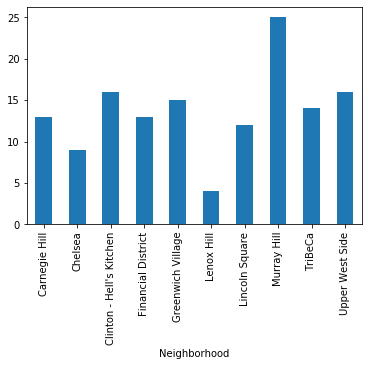

In [148]:
import matplotlib.pyplot as plt

df7.groupby('Neighborhood')['Venue Category'].nunique().plot(kind='bar')
plt.show()

### Plot of Total Number of Restuarants (Venue) in each Neighborhood

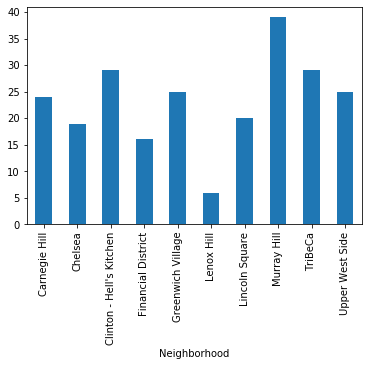

In [94]:
df7.groupby('Neighborhood')['Venue'].nunique().plot(kind='bar')
plt.show()

### Number of Unique type of Restaurants (Venue Category)

In [29]:
print('There are {} uniques categories.'.format(len(df7['Venue Category'].unique())))

There are 44 uniques categories.


### Number of Restaurants(Cat_Count) per Unique Category

In [95]:
df10 = df8.groupby('Venue Category').size().reset_index(name = "Cat_Count")
df10.head()

,Venue Category,Cat_Count
0,American Restaurant,18
1,Asian Restaurant,3
2,Australian Restaurant,1
3,Brazilian Restaurant,2
4,Cajun / Creole Restaurant,1


### Sorted the above dataframe in descending order (total number of restaurants for each category)

In [96]:
df11 = df10.sort_values(by=['Cat_Count'], ascending=False)
df11.head()

,Venue Category,Cat_Count
18,Italian Restaurant,40
0,American Restaurant,18
20,Japanese Restaurant,15
38,Sushi Restaurant,11
11,French Restaurant,11


## Top 5 categories of restaurant most popular

In [97]:
df12 = df11.head(5)
df12.head()

,Venue Category,Cat_Count
18,Italian Restaurant,40
0,American Restaurant,18
20,Japanese Restaurant,15
38,Sushi Restaurant,11
11,French Restaurant,11


### Plot of the 5 most popular Categories of restaurants 

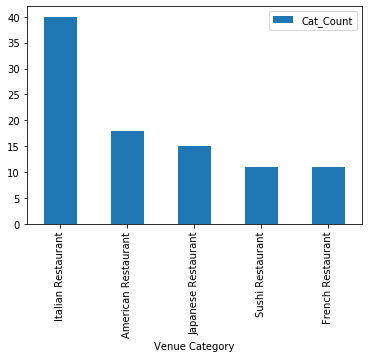

In [98]:
df12.plot(x='Venue Category', y='Cat_Count', kind='bar')

### Italian restuarant is the most popular one in the top ten expensive neighborhoods of Manhattan

### Getting all the restaurants in top ten expensive neighborhood

In [35]:
# one hot encoding
manhattan_onehot = pd.get_dummies(df7[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = df7['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,North Indian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shanghai Restaurant,Soba Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,TriBeCa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TriBeCa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,TriBeCa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,TriBeCa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14,TriBeCa,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
manhattan_onehot.shape

(232, 45)

In [37]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,North Indian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shanghai Restaurant,Soba Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Carnegie Hill,0.041667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.041667,0.00,0.125000,0.041667,0.000000,0.041667,0.00,0.250000,0.0000,0.125000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.083333,0.000000
1,Chelsea,0.105263,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.052632,0.0000,0.105263,0.000000,0.315789,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.105263,0.000000
2,Clinton - Hell's Kitchen,0.068966,0.000000,0.000000,0.068966,0.00,0.000000,0.068966,0.000000,0.034483,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.137931,0.0000,0.068966,0.000000,0.000000,0.034483,0.000000,0.034483,0.068966,0.000000,0.000000,0.068966,0.000000,0.034483,0.034483,0.034483,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.172414,0.00,0.034483,0.000000
3,Financial District,0.062500,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,0.125000,0.062500,0.062500,0.00,0.062500,0.000000,0.000000,0.062500,0.00,0.187500,0.0625,0.062500,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Greenwich Village,0.120000,0.000000,0.000000,0.000000,0.04,0.040000,0.000000,0.040000,0.000000,0.040000,0.000000,0.040000,0.00,0.040000,0.000000,0.000000,0.000000,0.00,0.280000,0.0000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.040000,0.00,0.120000,0.000000
5,Lenox Hill,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.00,0.000000,0.000000
6,Lincoln Square,0.050000,0.000000,0.000000,0.000000,0.00,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.150000,0.05,0.000000,0.000000,0.000000,0.000000,0.05,0.250000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.050000,0.00,0.000000,0.000000
7,Murray Hill,0.051282,0.000000,0.000000,0.000000,0.00,0.000000,0.025641,0.025641,0.000000,0.000000,0.000000,0.025641,0.00,0.025641,0.000000,0.025641,0.025641,0.00,0.076923,0.0000,0.102564,0.051282,0.000000,0.025641,0.025641,0.051282,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.025641,0.076923,0.051282,0.025

In [38]:
manhattan_grouped.shape

(10, 45)

### Top 10 most expensive neighborhoods along with the top 5 most common type of restaurants

In [39]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Carnegie Hill----
                           venue  freq
0             Italian Restaurant  0.25
1               Greek Restaurant  0.12
2            Japanese Restaurant  0.12
3  Vegetarian / Vegan Restaurant  0.08
4               Cuban Restaurant  0.08


----Chelsea----
                           venue  freq
0              Korean Restaurant  0.32
1            Japanese Restaurant  0.11
2  Vegetarian / Vegan Restaurant  0.11
3                     Restaurant  0.11
4        New American Restaurant  0.11


----Clinton - Hell's Kitchen----
                 venue  freq
0      Thai Restaurant  0.17
1   Italian Restaurant  0.14
2  American Restaurant  0.07
3   Chinese Restaurant  0.07
4  Japanese Restaurant  0.07


----Financial District----
                      venue  freq
0        Italian Restaurant  0.19
1        Falafel Restaurant  0.12
2       American Restaurant  0.06
3         French Restaurant  0.06
4  Mediterranean Restaurant  0.06


----Greenwich Village----
                      

### Function to sort the most common type restaurants in descending order.

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Creating the new dataframe and display the top 5 most common restaurants for 10 most expensive neighborhoods in Manhattan.

In [41]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Carnegie Hill,Italian Restaurant,Japanese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant
1,Chelsea,Korean Restaurant,American Restaurant,New American Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
2,Clinton - Hell's Kitchen,Thai Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Japanese Restaurant
3,Financial District,Italian Restaurant,Falafel Restaurant,American Restaurant,Restaurant,Indian Restaurant
4,Greenwich Village,Italian Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Thai Restaurant,Cuban Restaurant
5,Lenox Hill,Tapas Restaurant,Chinese Restaurant,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant
6,Lincoln Square,Italian Restaurant,Sushi Restaurant,French Restaurant,American Restaurant,Chinese Restaurant
7,Murray Hill,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Jewish Restaurant
8,TriBeCa,American Restaurant,Italian Restaurant,French Restaurant,New American Restaurant,Asian Restaurant
9,Upper West Side,Italian Restaurant,Mexican Restaurant,Indian Restaurant,Japanese Restaurant,Seafood Restaurant


# Clustering Neighborhoods
### Running k-means to cluster the neighborhood into 3 clusters

In [42]:
# set number of clusters
kclusters = 3

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [43]:
df6 = df5.rename(columns={'Neighborhoud': 'Neighborhood'})
print (df6)

     Borough              Neighborhood   Latitude  Longitude
0  Manhattan                   TriBeCa  40.718450 -74.008890
1  Manhattan                   Chelsea  40.747770 -73.990720
2  Manhattan         Greenwich Village  40.732110 -73.996480
3  Manhattan             Carnegie Hill  40.764950 -73.980430
4  Manhattan            Lincoln Square  40.776780 -73.982960
5  Manhattan           Upper West Side  40.792510 -73.973200
6  Manhattan        Financial District  40.709010 -74.010610
7  Manhattan                Lenox Hill  40.820469 -73.936303
8  Manhattan  Clinton - Hell's Kitchen  40.761450 -73.990440
9  Manhattan               Murray Hill  40.748550 -73.976050


In [44]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Carnegie Hill,Italian Restaurant,Japanese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant
1,Chelsea,Korean Restaurant,American Restaurant,New American Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
2,Clinton - Hell's Kitchen,Thai Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Japanese Restaurant
3,Financial District,Italian Restaurant,Falafel Restaurant,American Restaurant,Restaurant,Indian Restaurant
4,Greenwich Village,Italian Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Thai Restaurant,Cuban Restaurant


### Creating a new dataframe that includes the cluster labels as well as the latitude and longitude for top 5 types of restaurants for the 10 most expensive neighborhoods in Manhattan

In [45]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = df6

# merge manhattan_grouped with df5 to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Manhattan,TriBeCa,40.71845,-74.00889,0,American Restaurant,Italian Restaurant,French Restaurant,New American Restaurant,Asian Restaurant
1,Manhattan,Chelsea,40.74777,-73.99072,2,Korean Restaurant,American Restaurant,New American Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
2,Manhattan,Greenwich Village,40.73211,-73.99648,0,Italian Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Thai Restaurant,Cuban Restaurant
3,Manhattan,Carnegie Hill,40.76495,-73.98043,0,Italian Restaurant,Japanese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant
4,Manhattan,Lincoln Square,40.77678,-73.98296,0,Italian Restaurant,Sushi Restaurant,French Restaurant,American Restaurant,Chinese Restaurant


## Visualizing the clusters where the radius of circle represents the number of restaurants 

In [184]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=Restaurant_list[Neighborhoods_list.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Cluster 1: 
### Neighborhoods that contains the maximum number of restaurants
### Italian restaurants are the most common type in this cluster

In [181]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,TriBeCa,American Restaurant,Italian Restaurant,French Restaurant,New American Restaurant,Asian Restaurant
2,Greenwich Village,Italian Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Thai Restaurant,Cuban Restaurant
3,Carnegie Hill,Italian Restaurant,Japanese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant
4,Lincoln Square,Italian Restaurant,Sushi Restaurant,French Restaurant,American Restaurant,Chinese Restaurant
5,Upper West Side,Italian Restaurant,Mexican Restaurant,Indian Restaurant,Japanese Restaurant,Seafood Restaurant
6,Financial District,Italian Restaurant,Falafel Restaurant,American Restaurant,Restaurant,Indian Restaurant
8,Clinton - Hell's Kitchen,Thai Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Japanese Restaurant
9,Murray Hill,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Jewish Restaurant


## Cluster 2: 
### Lenox Hill has the least number of restaurants 

In [182]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Lenox Hill,Tapas Restaurant,Chinese Restaurant,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant


## Cluster 3: 
### Chelsea has mostly Asian type Restaurants

In [49]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Chelsea,Korean Restaurant,American Restaurant,New American Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
